<a href="https://colab.research.google.com/github/PLEX-GR00T/NLP/blob/main/Model_Comparison_Custom_QA_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!pip install git+https://github.com/deepset-ai/haystack.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/deepset-ai/haystack.git to /tmp/pip-req-build-mwon2h6z
  Running command git clone --filter=blob:none --quiet https://github.com/deepset-ai/haystack.git /tmp/pip-req-build-mwon2h6z
  Resolved https://github.com/deepset-ai/haystack.git to commit e4c3817d01c7c81c0accbdb543a0ab5cc9e86ade
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [32]:
from haystack.nodes import FARMReader

# Model 1: Models

In [33]:
model_name_1 = "deepset/roberta-base-squad2" 
model_name_2 = "distilbert-base-cased-distilled-squad"
model_name_3 = "deepset/minilm-uncased-squad2"

In [70]:
from haystack.nodes import FARMReader
reader_1 = FARMReader(model_name_or_path=model_name_1, use_gpu=True)
reader_2 = FARMReader(model_name_or_path=model_name_2, use_gpu=True)
reader_3 = FARMReader(model_name_or_path=model_name_3, use_gpu=True)

data_dir = "/content/drive/MyDrive/297_NLP/Final_Project/" 

## Training

In [71]:
reader_1.train(data_dir=data_dir, train_filename="train.json", use_gpu=True, n_epochs=3, save_dir="/content/drive/MyDrive/297_NLP/Final_Project/roberta") # save_dir is used for saving the model.

Train epoch 2/2 (Cur. train loss: 0.1465): 100%|██████████| 155/155 [01:16<00:00,  2.03it/s]


In [36]:
reader_2.train(data_dir=data_dir, train_filename="train.json", use_gpu=True, n_epochs=3, save_dir="/content/drive/MyDrive/297_NLP/Final_Project/distilbert") # save_dir is used for saving the model.

Train epoch 2/2 (Cur. train loss: 0.1076): 100%|██████████| 152/152 [00:37<00:00,  4.06it/s]


In [37]:
reader_3.train(data_dir=data_dir, train_filename="train.json", use_gpu=True, n_epochs=3, save_dir="/content/drive/MyDrive/297_NLP/Final_Project/minilm") # save_dir is used for saving the model.

Train epoch 2/2 (Cur. train loss: 0.6549): 100%|██████████| 151/151 [00:26<00:00,  5.60it/s]


In [38]:
model_1 = FARMReader(model_name_or_path="/content/drive/MyDrive/297_NLP/Final_Project/roberta")
model_2 = FARMReader(model_name_or_path="/content/drive/MyDrive/297_NLP/Final_Project/distilbert")
model_3 = FARMReader(model_name_or_path="/content/drive/MyDrive/297_NLP/Final_Project/minilm")

In [62]:
reader_eval_results_1 = model_1.eval_on_file( "/content/drive/MyDrive/297_NLP/Final_Project/test.json", "/content/drive/MyDrive/297_NLP/Final_Project/train.json", device="cuda")
reader_eval_results_2 = model_2.eval_on_file("/content/drive/MyDrive/297_NLP/Final_Project/test.json", "/content/drive/MyDrive/297_NLP/Final_Project/train.json", device="cuda")
reader_eval_results_3 = model_3.eval_on_file("/content/drive/MyDrive/297_NLP/Final_Project/test.json", "/content/drive/MyDrive/297_NLP/Final_Project/train.json", device="cuda")

- instead of giving you full control over which labels to use, this method always returns three types of metrics: combined (no suffix), text_answer ('_text_answer' suffix) and no_answer ('_no_answer' suffix) metrics.
- instead of comparing predictions with labels on a string level, this method compares them on a token-ID level. This makes it unable to do any string normalization (e.g. normalize whitespaces) beforehand.
Hence, results might slightly differ from those of `Pipeline.eval()`
.If you are just about starting to evaluate your model consider using `Pipeline.eval()` instead.
Evaluating: 100%|██████████| 31/31 [00:24<00:00,  1.24it/s]
- instead of giving you full control over which labels to use, this method always returns three types of metrics: combined (no suffix), text_answer ('_text_answer' suffix) and no_answer ('_no_answer' suffix) metrics.
- instead of comparing predictions with labels on a string level, this method compares them on a token-ID level. This makes it unable 

In [63]:
reader_eval_results_1

{'EM': 64.05228758169935,
 'f1': 82.8403731436587,
 'top_n_accuracy': 97.7124183006536,
 'top_n': 4,
 'EM_text_answer': 63.322185061315494,
 'f1_text_answer': 82.550125469207,
 'top_n_accuracy_text_answer': 97.65886287625418,
 'top_n_EM_text_answer': 66.10925306577481,
 'top_n_f1_text_answer': 89.80383026556903,
 'Total_text_answer': 897,
 'EM_no_answer': 95.23809523809523,
 'f1_no_answer': 95.23809523809523,
 'top_n_accuracy_no_answer': 100.0,
 'Total_no_answer': 21}

In [64]:
reader_eval_results_2

{'EM': 63.61655773420479,
 'f1': 80.63667833564566,
 'top_n_accuracy': 96.62309368191721,
 'top_n': 4,
 'EM_text_answer': 62.87625418060201,
 'f1_text_answer': 80.2948391439495,
 'top_n_accuracy_text_answer': 96.54403567447045,
 'top_n_EM_text_answer': 65.88628762541806,
 'top_n_f1_text_answer': 88.37373383985025,
 'Total_text_answer': 897,
 'EM_no_answer': 95.23809523809523,
 'f1_no_answer': 95.23809523809523,
 'top_n_accuracy_no_answer': 100.0,
 'Total_no_answer': 21}

In [65]:
reader_eval_results_3

{'EM': 61.22004357298475,
 'f1': 80.64260003066074,
 'top_n_accuracy': 96.40522875816994,
 'top_n': 4,
 'EM_text_answer': 60.31215161649944,
 'f1_text_answer': 80.18941675378656,
 'top_n_accuracy_text_answer': 96.32107023411372,
 'top_n_EM_text_answer': 62.76477146042363,
 'top_n_f1_text_answer': 86.38122280205508,
 'Total_text_answer': 897,
 'EM_no_answer': 100.0,
 'f1_no_answer': 100.0,
 'top_n_accuracy_no_answer': 100.0,
 'Total_no_answer': 21}

Testing

In [43]:
context = """No Country for Old Men is a 2007 American neo-Western crime thriller film written and directed by Joel and Ethan Coen, based on Cormac McCarthy's 2005 novel of the same name.
Starring Tommy Lee Jones, Javier Bardem, and Josh Brolin, the film is set in the desert landscape of 1980 West Texas.
The film revisits the themes of fate, conscience, and circumstance that the Coen brothers had explored in the films Blood Simple (1984), Raising Arizona (1987), and Fargo (1996).
The film follows three main characters: Llewelyn Moss (Brolin), a Vietnam War veteran and welder who stumbles upon a large sum of money in the desert; 
Anton Chigurh (Bardem), a hitman who is tasked with recovering the money; and Ed Tom Bell (Jones), a local sheriff investigating the crime. 
The film also stars Kelly Macdonald as Moss's wife Carla Jean, and Woody Harrelson as a bounty hunter seeking Moss and the return of the $2 million.
No Country for Old Men premiered in competition at the 2007 Cannes Film Festival on May 19.
The film became a commercial success, grossing $171 million worldwide against the budget of $25 million. 
Critics praised the Coens' direction and screenplay and Bardem's performance, and the film won 76 awards from 109 nominations from multiple organizations; 
it won four awards at the 80th Academy Awards (including Best Picture), three British Academy Film Awards (BAFTAs), and two Golden Globes.
The American Film Institute listed it as an AFI Movie of the Year,[6] and the National Board of Review selected it as the best of 2007"""

Q1 : All models

In [44]:
ques = 'In which year did No Country for Old Men released?'

In [45]:
from haystack import Pipeline, Document
from haystack.utils import print_answers

p = Pipeline()
p.add_node(component=model_1, name="Reader", inputs=["Query"])
res = p.run(
    query=ques, documents=[Document(content=context)]
)
print_answers(res,details="all")
     

Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 39.31 Batches/s]


Query: In which year did No Country for Old Men released?
Answers:
[   <Answer {'answer': '2007', 'type': 'extractive', 'score': 0.9887659549713135, 'context': "No Country for Old Men is a 2007 American neo-Western crime thriller film written and directed by Joel and Ethan Coen, based on Cormac McCarthy's 2005", 'offsets_in_document': [{'start': 28, 'end': 32}], 'offsets_in_context': [{'start': 28, 'end': 32}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>,
    <Answer {'answer': '2007', 'type': 'extractive', 'score': 0.08290092647075653, 'context': 'f the $2 million.\nNo Country for Old Men premiered in competition at the 2007 Cannes Film Festival on May 19.\nThe film became a commercial success, gr', 'offsets_in_document': [{'start': 969, 'end': 973}], 'offsets_in_context': [{'start': 73, 'end': 77}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>]


In [46]:
from haystack import Pipeline, Document
from haystack.utils import print_answers

p = Pipeline()
p.add_node(component=model_2, name="Reader", inputs=["Query"])
res = p.run(
    query=ques, documents=[Document(content=context)]
)
print_answers(res,details="all")
     

Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 55.15 Batches/s]


Query: In which year did No Country for Old Men released?
Answers:
[   <Answer {'answer': '2007', 'type': 'extractive', 'score': 0.8907051682472229, 'context': 'f the $2 million.\nNo Country for Old Men premiered in competition at the 2007 Cannes Film Festival on May 19.\nThe film became a commercial success, gr', 'offsets_in_document': [{'start': 969, 'end': 973}], 'offsets_in_context': [{'start': 73, 'end': 77}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>,
    <Answer {'answer': '2007', 'type': 'extractive', 'score': 0.6975401043891907, 'context': "No Country for Old Men is a 2007 American neo-Western crime thriller film written and directed by Joel and Ethan Coen, based on Cormac McCarthy's 2005", 'offsets_in_document': [{'start': 28, 'end': 32}], 'offsets_in_context': [{'start': 28, 'end': 32}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>]


In [47]:
from haystack import Pipeline, Document
from haystack.utils import print_answers

p = Pipeline()
p.add_node(component=model_3, name="Reader", inputs=["Query"])
res = p.run(
    query=ques, documents=[Document(content=context)]
)
print_answers(res,details="all")
     

Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 60.97 Batches/s]


Query: In which year did No Country for Old Men released?
Answers:
[   <Answer {'answer': '2007', 'type': 'extractive', 'score': 0.8900161981582642, 'context': "No Country for Old Men is a 2007 American neo-Western crime thriller film written and directed by Joel and Ethan Coen, based on Cormac McCarthy's 2005", 'offsets_in_document': [{'start': 28, 'end': 32}], 'offsets_in_context': [{'start': 28, 'end': 32}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>,
    <Answer {'answer': '2007', 'type': 'extractive', 'score': 0.3921046257019043, 'context': 'f the $2 million.\nNo Country for Old Men premiered in competition at the 2007 Cannes Film Festival on May 19.\nThe film became a commercial success, gr', 'offsets_in_document': [{'start': 969, 'end': 973}], 'offsets_in_context': [{'start': 73, 'end': 77}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>]


Q2

In [48]:
ques1 = 'what is the budget of the film?'

In [49]:
from haystack import Pipeline, Document
from haystack.utils import print_answers

p = Pipeline()
p.add_node(component=model_1, name="Reader", inputs=["Query"])
res = p.run(
    query=ques1, documents=[Document(content=context)]
)
print_answers(res,details="all")

Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 39.75 Batches/s]


Query: what is the budget of the film?
Answers:
[   <Answer {'answer': '$25 million', 'type': 'extractive', 'score': 0.9026716947555542, 'context': "ercial success, grossing $171 million worldwide against the budget of $25 million. \nCritics praised the Coens' direction and screenplay and Bardem's p", 'offsets_in_document': [{'start': 1098, 'end': 1109}], 'offsets_in_context': [{'start': 70, 'end': 81}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>,
    <Answer {'answer': "2007 American neo-Western crime thriller film written and directed by Joel and Ethan Coen, based on Cormac McCarthy's 2005 novel of the same name.\nStarring Tommy Lee Jones, Javier Bardem, and Josh Brolin, the film is set in the desert landscape of 1980 West Texas.\nThe film revisits the themes of fate, conscience, and circumstance that the Coen brothers had explored in the films Blood Simple (1984), Raising Arizona (1987), and Fargo (1996).\nThe film follows three main characters: Llewelyn Moss (

In [50]:
from haystack import Pipeline, Document
from haystack.utils import print_answers

p = Pipeline()
p.add_node(component=model_2, name="Reader", inputs=["Query"])
res = p.run(
    query=ques1, documents=[Document(content=context)]
)
print_answers(res,details="all")

Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 57.21 Batches/s]


Query: what is the budget of the film?
Answers:
[   <Answer {'answer': '$25 million', 'type': 'extractive', 'score': 0.7311739921569824, 'context': "ercial success, grossing $171 million worldwide against the budget of $25 million. \nCritics praised the Coens' direction and screenplay and Bardem's p", 'offsets_in_document': [{'start': 1098, 'end': 1109}], 'offsets_in_context': [{'start': 70, 'end': 81}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>,
    <Answer {'answer': '$2 million', 'type': 'extractive', 'score': 0.2831844687461853, 'context': 'Woody Harrelson as a bounty hunter seeking Moss and the return of the $2 million.\nNo Country for Old Men premiered in competition at the 2007 Cannes F', 'offsets_in_document': [{'start': 902, 'end': 912}], 'offsets_in_context': [{'start': 70, 'end': 80}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>]


In [51]:
from haystack import Pipeline, Document
from haystack.utils import print_answers

p = Pipeline()
p.add_node(component=model_3, name="Reader", inputs=["Query"])
res = p.run(
    query=ques1, documents=[Document(content=context)]
)
print_answers(res,details="all")

Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 67.40 Batches/s]


Query: what is the budget of the film?
Answers:
[   <Answer {'answer': '$25 million', 'type': 'extractive', 'score': 0.8504452705383301, 'context': "ercial success, grossing $171 million worldwide against the budget of $25 million. \nCritics praised the Coens' direction and screenplay and Bardem's p", 'offsets_in_document': [{'start': 1098, 'end': 1109}], 'offsets_in_context': [{'start': 70, 'end': 81}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>,
    <Answer {'answer': '$2 million', 'type': 'extractive', 'score': 0.7561939358711243, 'context': 'Woody Harrelson as a bounty hunter seeking Moss and the return of the $2 million.\nNo Country for Old Men premiered in competition at the 2007 Cannes F', 'offsets_in_document': [{'start': 902, 'end': 912}], 'offsets_in_context': [{'start': 70, 'end': 80}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>]


## Q3 : all models

In [52]:
ques2 = 'who is the director of No Country for Old Men?'

In [53]:
from haystack import Pipeline, Document
from haystack.utils import print_answers

p = Pipeline()
p.add_node(component=model_1, name="Reader", inputs=["Query"])
res = p.run(
    query=ques2, documents=[Document(content=context)]
)
print_answers(res,details="all")

Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 37.89 Batches/s]


Query: who is the director of No Country for Old Men?
Answers:
[   <Answer {'answer': 'Joel and Ethan Coen', 'type': 'extractive', 'score': 0.9454846978187561, 'context': " American neo-Western crime thriller film written and directed by Joel and Ethan Coen, based on Cormac McCarthy's 2005 novel of the same name.\nStarrin", 'offsets_in_document': [{'start': 98, 'end': 117}], 'offsets_in_context': [{'start': 66, 'end': 85}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>,
    <Answer {'answer': 'Coens', 'type': 'extractive', 'score': 0.7879358530044556, 'context': "illion worldwide against the budget of $25 million. \nCritics praised the Coens' direction and screenplay and Bardem's performance, and the film won 76", 'offsets_in_document': [{'start': 1132, 'end': 1137}], 'offsets_in_context': [{'start': 73, 'end': 78}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>]


In [54]:
from haystack import Pipeline, Document
from haystack.utils import print_answers

p = Pipeline()
p.add_node(component=model_2, name="Reader", inputs=["Query"])
res = p.run(
    query=ques2, documents=[Document(content=context)]
)
print_answers(res,details="all")

Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 58.19 Batches/s]


Query: who is the director of No Country for Old Men?
Answers:
[   <Answer {'answer': 'Joel and Ethan Coen', 'type': 'extractive', 'score': 0.9386968016624451, 'context': " American neo-Western crime thriller film written and directed by Joel and Ethan Coen, based on Cormac McCarthy's 2005 novel of the same name.\nStarrin", 'offsets_in_document': [{'start': 98, 'end': 117}], 'offsets_in_context': [{'start': 66, 'end': 85}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>,
    <Answer {'answer': 'Ed Tom Bell (Jones)', 'type': 'extractive', 'score': 0.001408819342032075, 'context': 'h (Bardem), a hitman who is tasked with recovering the money; and Ed Tom Bell (Jones), a local sheriff investigating the crime. \nThe film also stars K', 'offsets_in_document': [{'start': 702, 'end': 721}], 'offsets_in_context': [{'start': 66, 'end': 85}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>]


In [55]:
from haystack import Pipeline, Document
from haystack.utils import print_answers

p = Pipeline()
p.add_node(component=model_3, name="Reader", inputs=["Query"])
res = p.run(
    query=ques2, documents=[Document(content=context)]
)
print_answers(res,details="all")

Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 67.20 Batches/s]


Query: who is the director of No Country for Old Men?
Answers:
[   <Answer {'answer': 'Coens', 'type': 'extractive', 'score': 0.948986828327179, 'context': "illion worldwide against the budget of $25 million. \nCritics praised the Coens' direction and screenplay and Bardem's performance, and the film won 76", 'offsets_in_document': [{'start': 1132, 'end': 1137}], 'offsets_in_context': [{'start': 73, 'end': 78}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>,
    <Answer {'answer': 'Joel and Ethan Coen', 'type': 'extractive', 'score': 0.9084916114807129, 'context': " American neo-Western crime thriller film written and directed by Joel and Ethan Coen, based on Cormac McCarthy's 2005 novel of the same name.\nStarrin", 'offsets_in_document': [{'start': 98, 'end': 117}], 'offsets_in_context': [{'start': 66, 'end': 85}], 'document_id': 'ea91e9aaa97e3f4798d9fe101fc4d4fd', 'meta': {}}>]


## Visualizaitons

In [56]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

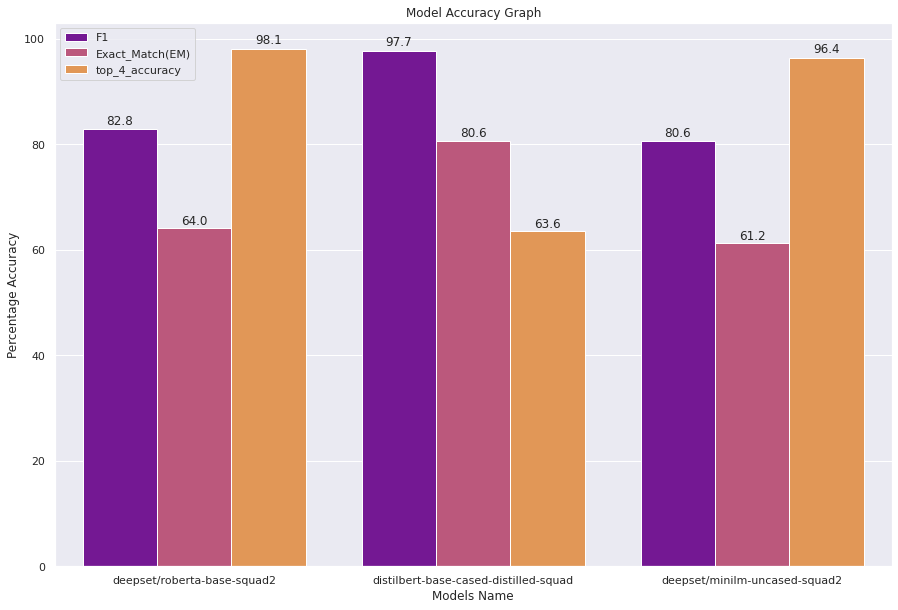

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np

d = {
    'x':    ['deepset/roberta-base-squad2', 'deepset/roberta-base-squad2',  'deepset/roberta-base-squad2', 'distilbert-base-cased-distilled-squad', 'distilbert-base-cased-distilled-squad', 'distilbert-base-cased-distilled-squad', 'deepset/minilm-uncased-squad2', 'deepset/minilm-uncased-squad2', 'deepset/minilm-uncased-squad2'],
    'y':    [   82.84,    64.05,   98.10,     97.71,     80.63,     63.61,    80.64,    61.25,   96.40],
    'group':[  'F1',  'Exact_Match(EM)', 'top_4_accuracy',   'F1',  'Exact_Match(EM)',  'top_4_accuracy',   'F1',  'Exact_Match(EM)',  'top_4_accuracy']
}

# sns.barplot(x='x', y='y', hue="group", data=d)


sns.set(rc={'figure.figsize':(15, 10)})
ax = sns.barplot(x='x', y='y', hue="group", data=d, palette='plasma')
ax.set(ylabel="Percentage Accuracy", xlabel="Models Name", title="Model Accuracy Graph")
ax.tick_params(axis='x')

#show values on barplot
show_values(ax, "v", space=0)
fig = ax.get_figure()
fig.savefig('/content/drive/MyDrive/297_NLP/Final_Project/Models_Accuracy_compare', dpi = 400) 

## Question Model Accuracy compare.

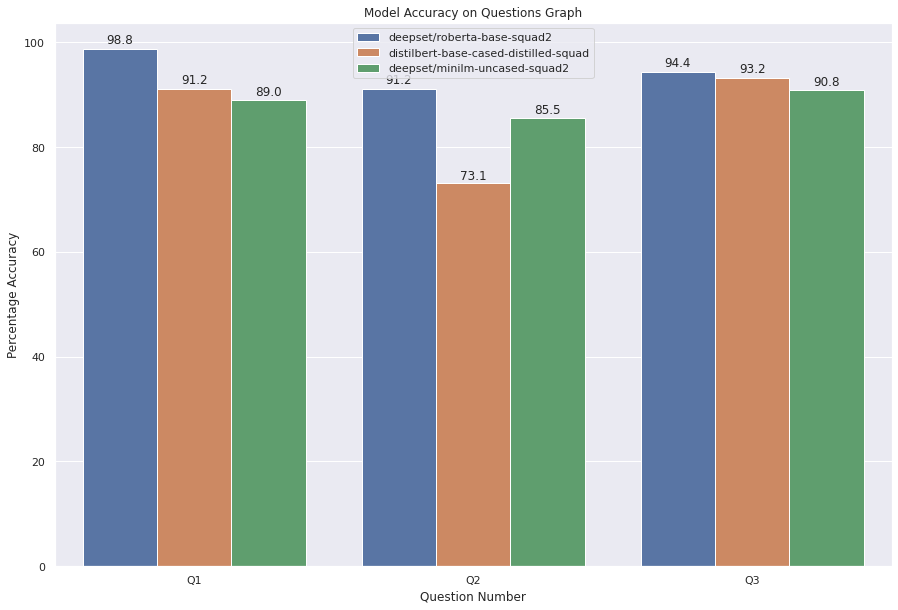

In [73]:
d = {
    'x':    ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3'],
    'y':    [   98.80,    91.18,   89.03,     91.18,     73.07,     85.54,    94.38,    93.21,   90.84],
    'group':[  'deepset/roberta-base-squad2',  'distilbert-base-cased-distilled-squad', 'deepset/minilm-uncased-squad2',   'deepset/roberta-base-squad2',  'distilbert-base-cased-distilled-squad',  'deepset/minilm-uncased-squad2',   'deepset/roberta-base-squad2',  'distilbert-base-cased-distilled-squad',  'deepset/minilm-uncased-squad2']
}

# sns.barplot(x='x', y='y', hue="group", data=d)


sns.set(rc={'figure.figsize':(15, 10)})
ax = sns.barplot(x='x', y='y', hue="group", data=d)
ax.set(ylabel="Percentage Accuracy", xlabel="Question Number", title="Model Accuracy on Questions Graph")
ax.tick_params(axis='x', )

#show values on barplot
show_values(ax, "v", space=0)
fig = ax.get_figure()
fig.savefig('/content/drive/MyDrive/297_NLP/Final_Project/Question_Models_Accuracy_compare', dpi = 400)